# Math Camp Assignment

Click <kbd>RUN</kbd> to run this code.

true intercept = 5, true slope = 10

estimated intercept = 5.176256959684331, estimated slope = 10.325246764062335


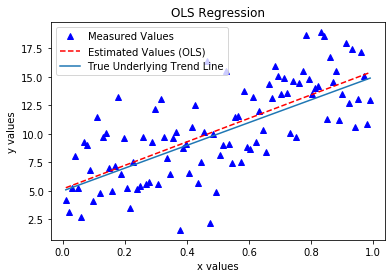

In [1]:
%matplotlib inline
# import numpy
import matplotlib.pyplot as plt
from numpy.random import normal as randn
from numpy import matrix, asscalar
from numpy.linalg import inv


alpha = 5 #y-intercept
beta = 10 #slope
error_std_dev = 3
n = 100
min = 0.01
max = 1

xvals = [min + x*(max-min)/n for x in range(n)]

y_exact = [beta*x + alpha for x in xvals]
errors = [randn(0,error_std_dev) for x in range(n)]
y_measured = [y_exact[i] + errors[i] for i in range(n)]
y_measured_matrix = matrix([[y] for y in y_measured]) #turn list into nx1 matrix (vector)


X = matrix([[1,x] for x in xvals])
OLS = inv(X.transpose() * X) * X.transpose() * y_measured_matrix #Estimating alpha and beta
alpha_hat = OLS[0][0].item()
beta_hat = OLS[1][0].item()
print(f"true intercept = {alpha}, true slope = {beta}\n\nestimated intercept = {alpha_hat}, estimated slope = {beta_hat}")
y_estimated = [alpha_hat + beta_hat * x for x in xvals]



fig,ax = plt.subplots()

ax.plot(xvals,y_measured,'b^',label='Measured Values')
ax.plot(xvals,y_estimated,'r--',label='Estimated Values (OLS)')
ax.plot(xvals,y_exact,label='True Underlying Trend Line')
legend = ax.legend()
plt.ylabel('y values')
plt.xlabel('x values')
plt.title('OLS Regression')
plt.show()
